## Preprocessing

In [140]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [141]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"],axis = 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [142]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [143]:
print(application_df["INCOME_AMT"].value_counts())

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64


In [144]:
# Drop the "INCOME_AMT" column, which has 24388 "0" value.
application_df = application_df.drop(["INCOME_AMT"],axis = 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,N,142590,1


In [145]:
print(application_df["ASK_AMT"].value_counts())

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64


In [146]:
# Bin based on "ASK_AMT"
amount_bins = [0, 5000, np.inf]
amount_labels = [1, 2]

application_df["ASK_AMT"] = pd.cut(application_df["ASK_AMT"], amount_bins, labels=amount_labels)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,N,1,1
1,T3,Independent,C2000,Preservation,Co-operative,1,N,2,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,N,1,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,N,2,1
4,T3,Independent,C1000,Heathcare,Trust,1,N,2,1


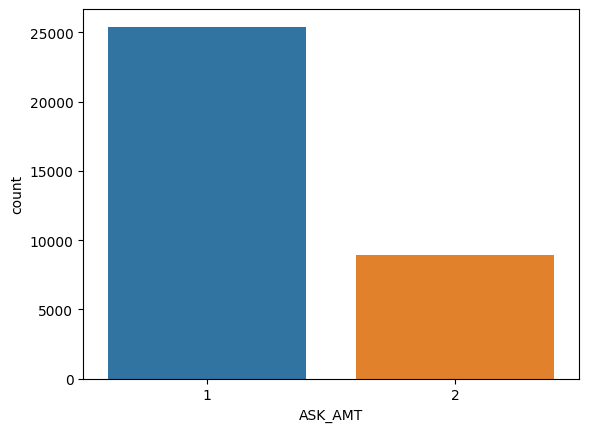

In [147]:
sns.countplot(x ="ASK_AMT", data=application_df)
plt.show()

In [148]:
# Look at APPLICATION_TYPE value counts for binning
print(application_df['APPLICATION_TYPE'].value_counts())

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64


In [149]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T9","T13","T12","T2","T25","T14","T29","T15","T17"]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [150]:
# Look at CLASSIFICATION value counts for binning
print(application_df['CLASSIFICATION'].value_counts())

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [151]:
# You may find it helpful to look at CLASSIFICATION value counts >1

print(application_df["CLASSIFICATION"].value_counts()[application_df['CLASSIFICATION'].value_counts() > 1])


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64


In [152]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace_1 = application_df["CLASSIFICATION"].value_counts()[application_df['CLASSIFICATION'].value_counts() < 1883]
#print(classifications_to_replace)
classifications_to_replace=dict(classifications_to_replace_1)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

 #Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [153]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
#application_df

In [154]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [155]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [156]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=85, activation="relu", input_dim=35))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=35, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 85)                3060      
                                                                 
 dense_47 (Dense)            (None, 35)                3010      
                                                                 
 dense_48 (Dense)            (None, 1)                 36        
                                                                 
Total params: 6,106
Trainable params: 6,106
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [158]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5746 - accuracy: 0.7181
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5586 - accuracy: 0.7275
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5561 - accuracy: 0.7272
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5542 - accuracy: 0.7282
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7282
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7304
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7280
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5512 - accuracy: 0.7300
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5509 - accuracy: 0.7292
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5503 - accura

In [159]:

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5600 - accuracy: 0.7206 - 440ms/epoch - 2ms/step
Loss: 0.5599886178970337, Accuracy: 0.7205830812454224


In [ ]:
# Export our model to HDF5 file

nn.save("AlphabetSoupCharity_Optimization.h5")